Logistische Regression ist ein Verfahren für die (binäre) Klassifikation

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from plotting import plot_dataset
from plotting import plot
from dataset import generate_dataset

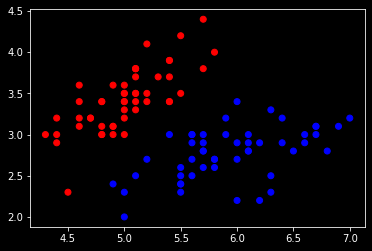

In [3]:
x, y = generate_dataset()
plot_dataset(x, y)

In [6]:
class LogisticRegression():
    def __init__(self, learning_rate: float = 0.1, max_iter: int = 10_000, fit_intercept: bool = True) -> None:
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept # "y-Achsenabschnitt"

    def add_bias(self, x: np.ndarray) -> np.ndarray:
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis = 1)

    def _activation(self, z: np.ndarray) -> np.ndarray:
        return 1.0 / (1.0 + np.exp(-z))

    def _forward(self, x: np.ndarray) -> np.ndarray:
        if x.shape[1] != self.w.shape[0] and self.fit_intercept:
            x = self.add_bias(x)
        z = np.dot(x, self.w)
        y_pred = self._activation(z)
        return y_pred

    def _update_weights(self, x: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> None:
        # Hier werden hauptsächlich die Formeln umgesetzt
        loss = y_pred - y
        gradient = np.dot(x.T, loss) / y.shape[0] # .dot --> dot product of two arrays bzw. Skalarprodukt
        self.w = self.w - self.learning_rate * gradient
    
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.fit_intercept:
            x = self.add_bias(x)
        _, dim = x.shape
        self.w = np.random.normal(loc = 0.0, scale = 0.01, size = (dim,))
        for _ in range(self.max_iter):
            y_pred = self._forward(x)
            self._update_weights(x, y, y_pred)

    def predict_prob(self, x: np.ndarray):
        return self._forward(x)

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred_prob = self.predict_prob(x)
        return np.round(y_pred_prob)

    def score(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        y_pred = self.predict(x)
        return np.mean(y == y_pred)

In [9]:
clf = LogisticRegression(learning_rate=0.001, max_iter = 10_000, fit_intercept=False)
clf.fit(x, y)
score = clf.score(x, y)
print(f'Acc: {score}')
print(f'W:\n{clf.w}')

Acc: 0.99
W:
[ 0.90296131 -1.57285153]


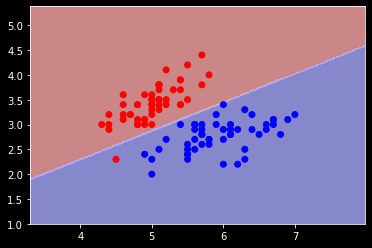

In [10]:
plot(clf, x, y)